In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"삼육대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
돈: 0.0195
경제: 0.0074
속성: 0.0066
해야: 0.0058
회계: 0.0057
공부: 0.0057
소득: 0.0057
원: 0.0057
대한: 0.0050
방법: 0.0048

토픽 2:
세계: 0.0077
집: 0.0044
하며: 0.0039
투자: 0.0039
대한: 0.0034
꿈: 0.0034
문화: 0.0034
사랑: 0.0034
감정: 0.0034
위해: 0.0034

토픽 3:
포터: 0.0097
해리: 0.0097
부: 0.0061
세계: 0.0055
시리즈: 0.0055
실행: 0.0055
사랑: 0.0049
기업: 0.0037
하며: 0.0037
통계: 0.0037

토픽 4:
플랫폼: 0.0109
산업혁명: 0.0105
차: 0.0090
기업: 0.0086
세계: 0.0071
질서: 0.0065
해야: 0.0058
될: 0.0040
중국: 0.0039
혼돈: 0.0039

토픽 5:
부자: 0.0064
편의점: 0.0059
서점: 0.0054
자본론: 0.0054
차선: 0.0054
추월: 0.0054
돈: 0.0043
알: 0.0043
문제: 0.0038
가장: 0.0038



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.40592971251883203


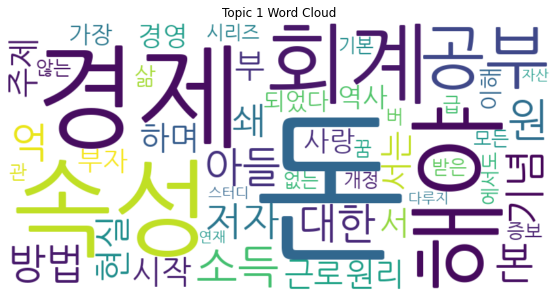

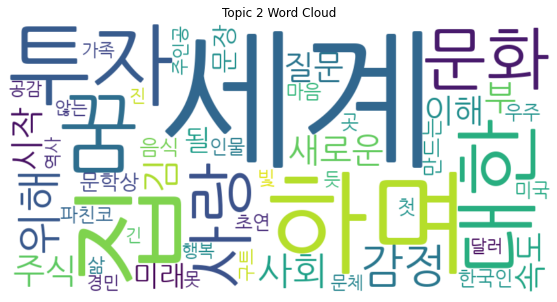

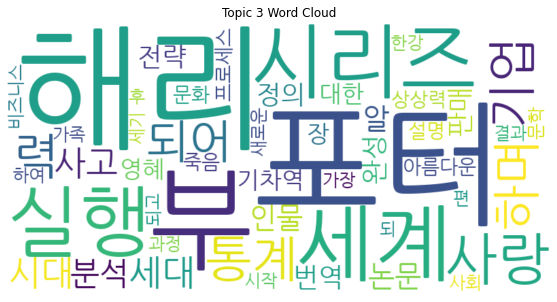

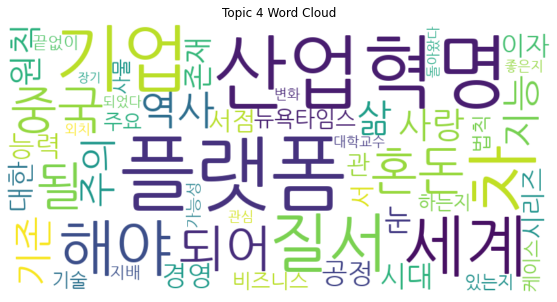

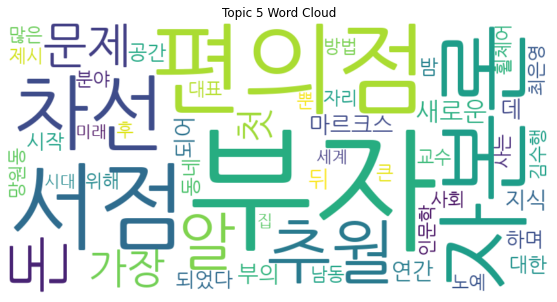

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
논문: 0.0088
학위: 0.0081
사회: 0.0074
대학: 0.0067
분석: 0.0067
컨설팅: 0.0052
기업: 0.0052
통계: 0.0052
경제학: 0.0052
권: 0.0052

토픽 2:
세계: 0.0080
그녀: 0.0062
되었다: 0.0051
포터: 0.0051
글: 0.0046
미국: 0.0046
해리: 0.0046
시리즈: 0.0040
롤링: 0.0040
주: 0.0035

토픽 3:
세계: 0.0150
기업가: 0.0057
영화: 0.0057
문학상: 0.0057
로서: 0.0048
국어: 0.0048
집: 0.0048
미국: 0.0039
되었다: 0.0039
영국: 0.0039

토픽 4:
대학교: 0.0116
정의: 0.0116
세계: 0.0079
샌델: 0.0078
철학: 0.0078
교수: 0.0069
마이클: 0.0059
자유: 0.0049
하버드: 0.0049
세: 0.0049

토픽 5:
회계: 0.0072
강의: 0.0065
영국: 0.0058
실무: 0.0058
시작: 0.0051
집: 0.0051
빛: 0.0051
가장: 0.0051
대상: 0.0044
게임: 0.0044



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.41304093209405873


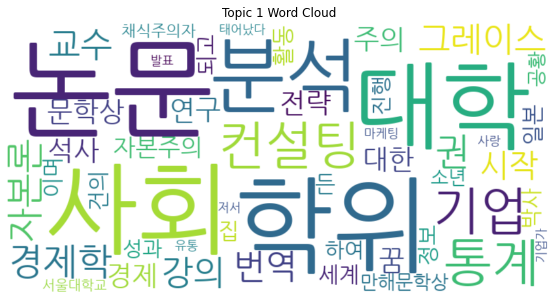

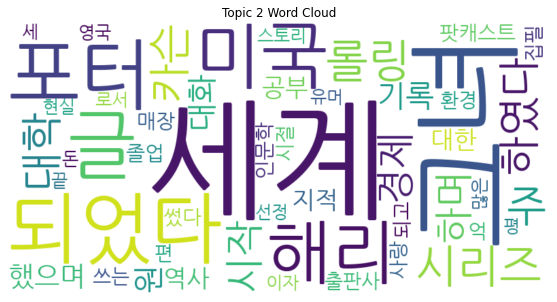

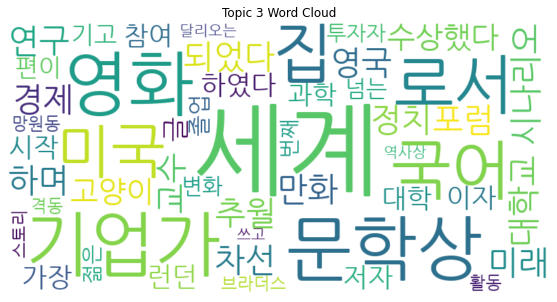

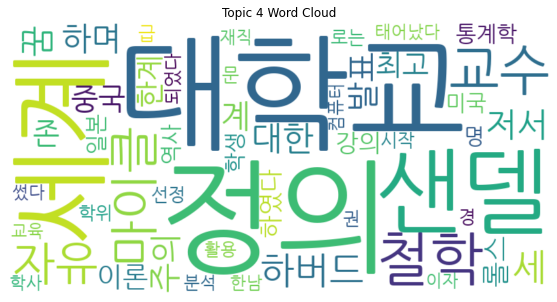

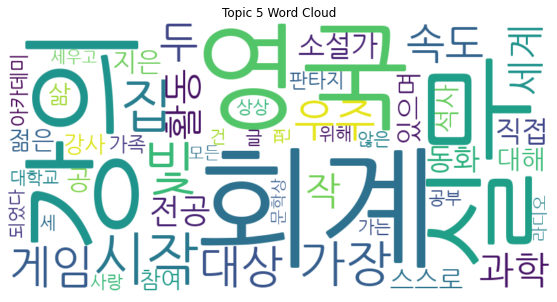

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()